## Classical Model

The classical model is designed from the data set that was made in the data analysis section, for this will be with the use of neural networks to predict when there is a backorder and thus pass the data to the company responsible for the distribution and storage.


In case you don't have installed tensorflow uncomment the following cell

Import the labraries as pandas to load the csv file, numpy for the seed, keras and tensorflow the framework for generate the machine learning methods as neurnal networks, and sklearn for the metrics.

In [2]:
# load csv file
import pandas as pd

# numpy to the seed 
import numpy as np

# load csv fileframework to neural networks
import tensorflow as tf

#Method forthe  neural network
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense, Dropout

#save as image the model summary
from tensorflow.keras.utils import plot_model

# librariesto plot
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

Load the train and test sets from the Data analysis module

In [4]:
data_train = pd.read_csv("/Users/charan/Downloads/Quantum-Supply-Chain-Manager-main/dataset/classic_train.csv")
X_train,y_train = data_train[data_train.columns[:16]].values, data_train[data_train.columns[16]].values

data_test = pd.read_csv("/Users/charan/Downloads/Quantum-Supply-Chain-Manager-main/dataset/classic_test.csv")
X_test,y_test = data_test[data_test.columns[:16]].values, data_test[data_test.columns[16]].values

(X_train.shape, y_train.shape),(X_test.shape, y_test.shape)

(((20164, 16), (20164,)), ((6159, 16), (6159,)))

###### Random seed for reproducibility

In the same case of reproducing the code it is important to consider the numpy seed, for this purpose the following cell is used

In [5]:
np.random.seed(123)
tf.random.set_seed(123)

For neural networks is important to normalize and check the distribution of the variables for that exist the variable StandarScaler that 
    - Scaling by Normalization or min-max scaling
    - Scaling by mean and standard deviation or standardization
    
1. StandardScaler is a function used to standardize the data .
2. Standardized value for x is computed as (x-mean(column))/standard deviation(column). 

In [6]:
scale = StandardScaler()

In [7]:
scale.fit(X_train)

StandardScaler()

Apply the StandardScaler to the train and test sets

In [8]:
X_train_std = scale.transform(X_train)
X_test_std = scale.transform(X_test)

Check the values after that

In [9]:
X_train_std[1], y_train[1]

(array([-0.05809688,  0.9007084 , -0.05940273, -0.08941685, -0.09168696,
        -0.09086958, -0.0999199 , -0.10131375, -0.0994877 , -0.10213846,
        -0.101395  , -0.0780332 ,  0.27081242,  0.1817839 , -0.05455819,
         0.39386915]),
 0)

## The model 
After providing different layers, from 5 to 3, from 30 to 25 initial layer with 16 parameters out of the 21 initial ones, and the activation functions relu, sigmoid, tanh the following model was considered as the one with the best accuracy, precision,auc, and recall.

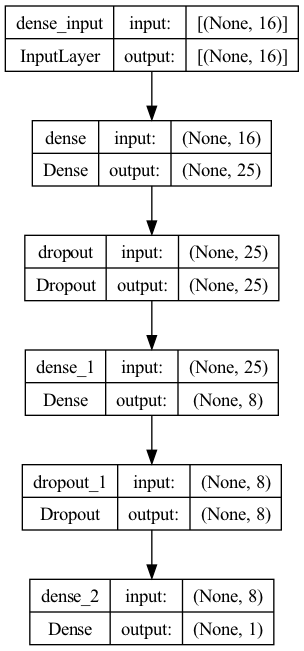

In [10]:
model = Sequential()

model.add(Dense(25, input_dim=16, activation='relu', kernel_regularizer=l2(1e-6),kernel_initializer="glorot_normal"))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu',kernel_regularizer=l2(1e-6), kernel_initializer="glorot_normal"))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid',kernel_regularizer=l2(1e-6), kernel_initializer="glorot_normal"))

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Since they are unbalanced values, it is common to deal with the Area under the ROC Curve(AUC)

this works  using True Positive Rate and False Positive Rate, where they are defined as :

- **True Positive Rate (TPR)** is a synonym for recall and is therefore defined as follows:
$$
T P R=\frac{T P}{T P+F N}
$$
- **False Positive Rate (FPR)** is defined as follows:
$$
F P R=\frac{F P}{F P+T N}
$$

metric instead of accuracy, therefore both were selected to train the model with the Adam optimizer. Using binary crossentropy because is a binary classification 

$$\operatorname{Loss}=-\frac{1}{\begin{array}{c}
\text { output } \\
\text { size }
\end{array}} \sum_{i=1}^{\substack{\text { output } \\
\text { size }}} y_{i} \cdot \log \hat{y}_{i}+\left(1-y_{i}\right) \cdot \log \left(1-\hat{y}_{i}\right).
$$

In [11]:
# Compile model
auc = tf.keras.metrics.AUC()
model.compile(loss='binary_crossentropy', optimizer="Adam", metrics=['accuracy',auc])

Using 100 epochs a batch size of 32, with a validation split of 0.2 of the  train data

In [12]:
model_history = model.fit(X_train_std, y_train, epochs=100,
                                        batch_size=32, 
                                        validation_split=0.3, shuffle=True)

Epoch 1/100
442/442 [==============================] - 0s 595us/step - loss: 0.6398 - accuracy: 0.6844 - auc: 0.5470 - val_loss: 1.0747 - val_accuracy: 0.0000e+00 - val_auc: 0.0000e+00
Epoch 2/100
442/442 [==============================] - 0s 410us/step - loss: 0.5998 - accuracy: 0.7081 - auc: 0.5806 - val_loss: 1.0849 - val_accuracy: 0.0018 - val_auc: 0.0000e+00
Epoch 3/100
442/442 [==============================] - 0s 404us/step - loss: 0.5928 - accuracy: 0.7088 - auc: 0.5972 - val_loss: 1.1085 - val_accuracy: 0.0045 - val_auc: 0.0000e+00
Epoch 4/100
442/442 [==============================] - 0s 405us/step - loss: 0.5904 - accuracy: 0.7106 - auc: 0.6096 - val_loss: 1.1631 - val_accuracy: 0.0081 - val_auc: 0.0000e+00
Epoch 5/100
442/442 [==============================] - 0s 403us/step - loss: 0.5869 - accuracy: 0.7082 - auc: 0.6196 - val_loss: 1.1427 - val_accuracy: 0.0086 - val_auc: 0.0000e+00
Epoch 6/100
442/442 [==============================] - 0s 404us/step - loss: 0.5802 - accur

442/442 [==============================] - 0s 410us/step - loss: 0.4485 - accuracy: 0.7855 - auc: 0.8438 - val_loss: 0.7974 - val_accuracy: 0.5514 - val_auc: 0.0000e+00
Epoch 47/100
442/442 [==============================] - 0s 409us/step - loss: 0.4472 - accuracy: 0.7806 - auc: 0.8399 - val_loss: 0.6554 - val_accuracy: 0.7307 - val_auc: 0.0000e+00
Epoch 48/100
442/442 [==============================] - 0s 408us/step - loss: 0.4438 - accuracy: 0.7914 - auc: 0.8432 - val_loss: 0.8683 - val_accuracy: 0.5296 - val_auc: 0.0000e+00
Epoch 49/100
442/442 [==============================] - 0s 409us/step - loss: 0.4450 - accuracy: 0.7828 - auc: 0.8443 - val_loss: 0.8959 - val_accuracy: 0.5073 - val_auc: 0.0000e+00
Epoch 50/100
442/442 [==============================] - 0s 409us/step - loss: 0.4492 - accuracy: 0.7825 - auc: 0.8412 - val_loss: 0.8733 - val_accuracy: 0.5058 - val_auc: 0.0000e+00
Epoch 51/100
442/442 [==============================] - 0s 410us/step - loss: 0.4519 - accuracy: 0.7842

442/442 [==============================] - 0s 409us/step - loss: 0.4253 - accuracy: 0.8027 - auc: 0.8586 - val_loss: 0.9889 - val_accuracy: 0.4354 - val_auc: 0.0000e+00
Epoch 92/100
442/442 [==============================] - 0s 410us/step - loss: 0.4406 - accuracy: 0.8033 - auc: 0.8572 - val_loss: 0.7023 - val_accuracy: 0.6640 - val_auc: 0.0000e+00
Epoch 93/100
442/442 [==============================] - 0s 409us/step - loss: 0.4222 - accuracy: 0.8046 - auc: 0.8644 - val_loss: 0.8055 - val_accuracy: 0.5478 - val_auc: 0.0000e+00
Epoch 94/100
442/442 [==============================] - 0s 417us/step - loss: 0.4239 - accuracy: 0.8037 - auc: 0.8632 - val_loss: 0.8476 - val_accuracy: 0.6000 - val_auc: 0.0000e+00
Epoch 95/100
442/442 [==============================] - 0s 412us/step - loss: 0.4247 - accuracy: 0.8003 - auc: 0.8596 - val_loss: 0.8482 - val_accuracy: 0.5621 - val_auc: 0.0000e+00
Epoch 96/100
442/442 [==============================] - 0s 409us/step - loss: 0.4222 - accuracy: 0.8081

## Predictions

After that we used the predictions  of the  train and test set

In [13]:
train_pred = model.predict(X_train_std)
test_pred = model.predict(X_test_std)

193/193 [==============================] - 0s 177us/step


to convert the predict values into the classes was designed an condition that looks as 

In [14]:
y_train_pred = (model.predict(X_train_std) > 0.5).astype("int32")
y_test_pred = (model.predict(X_test_std) > 0.5).astype("int32")

193/193 [==============================] - 0s 179us/step


### Getting evaluation metrics and evaluating model performance

Using different metrics as 

- accuracy
- precision
- recall
- f1 score
- cohen_kappa
- roc_auc


The results of the train are important to check the F1 score and ROC AUC, they are 

- F1 score: 0.829091
- ROC AUC: 0.836898

that are good for a imbalance data set, where the goal is 1 for both

Accuracy: 0.800040
Precision: 0.898700
Recall: 0.679949
F1 score: 0.774168
Cohens kappa: 0.600850
ROC AUC: 0.801024
[[9221  779]
 [3253 6911]]


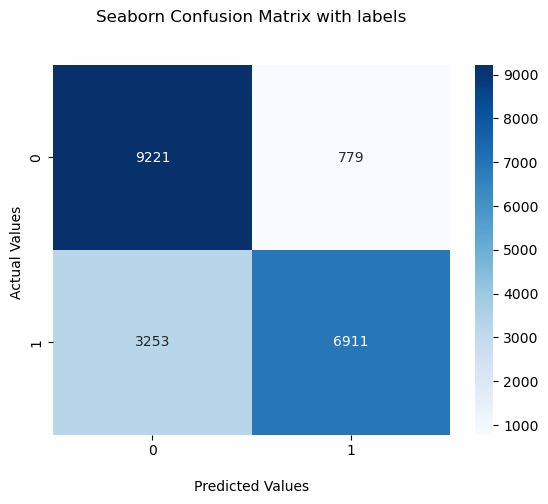

In [15]:
accuracy = accuracy_score(y_train, y_train_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_train, y_train_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, y_train_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, y_train_pred)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_train, y_train_pred)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_train, y_train_pred)
print('ROC AUC: %f' % auc)
# confusion matrix
train_matrix = confusion_matrix(y_train, y_train_pred)
print(train_matrix)
ax = sns.heatmap(train_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

The results of the test are important to check the F1 score and ROC AUC, they are 

- F1 score: 0.681327
- ROC AUC: 0.833400

that are good for a imbalance data set, where the goal is 1 for both

Accuracy: 0.880013
Precision: 0.672566
Recall: 0.673162
F1 score: 0.672864
Cohens kappa: 0.599398
ROC AUC: 0.799802
[[4660  370]
 [ 369  760]]


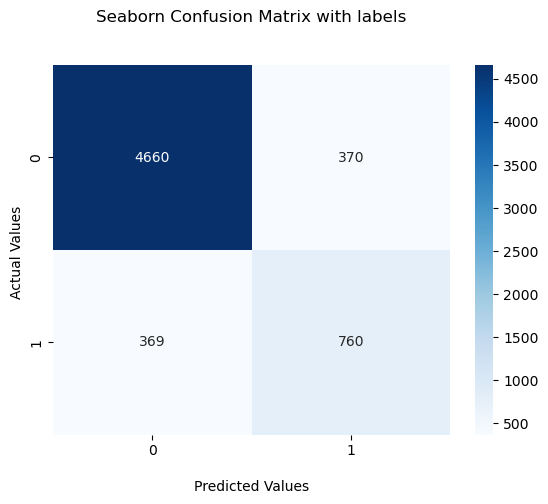

In [16]:
accuracy = accuracy_score(y_test, y_test_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_test_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_test_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_test_pred)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, y_test_pred)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, y_test_pred)
print('ROC AUC: %f' % auc)
# confusion matrix
test_matrix = confusion_matrix(y_test, y_test_pred)
print(test_matrix)
ax = sns.heatmap(test_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()